<div style="text-align: center;">
  <img src="https://github.com/Hack-io-Data/Imagenes/blob/main/01-LogosHackio/logo_naranja@4x.png?raw=true" alt="esquema" />
</div>


# Laboratorio Clustering


### Contexto del Problema

Eres un científico de datos contratado por una federación deportiva internacional que desea mejorar sus programas de entrenamiento personalizados. La federación maneja una gran variedad de atletas que participan en diferentes disciplinas deportivas, y cada uno tiene necesidades de entrenamiento y desarrollo únicas. Para maximizar el rendimiento y mejorar la efectividad de los programas de entrenamiento, la federación quiere segmentar a sus atletas en grupos homogéneos basados en sus características físicas, habilidades y comportamientos de entrenamiento.


### Los datos

- **name**: Nombre del atleta. Es una variable categórica que identifica a cada atleta de manera única.

- **gender**: Género del atleta. Es una variable categórica que indica si el atleta es masculino ("Male") o femenino ("Female").

- **age**: Edad del atleta. Es una variable numérica que representa la edad del atleta en años.

- **height**: Altura del atleta. Es una variable numérica que representa la altura del atleta en centímetros.

- **nationality**: Nacionalidad del atleta. Es una variable categórica que indica el país de origen del atleta.

- **weight**: Peso del atleta. Es una variable numérica que representa el peso del atleta en kilogramos.

- **sports**: Deportes que practica el atleta. Es una variable categórica que puede contener múltiples valores (deportes) separados por comas.

- **hours_per_day**: Horas de entrenamiento por día. Es una variable numérica que indica el número promedio de horas que el atleta entrena cada día.

- **strength**: Fuerza del atleta. Es una variable numérica que representa la evaluación de la fuerza del atleta en una escala (por ejemplo, de 1 a 10).

- **agility**: Agilidad del atleta. Es una variable numérica que representa la evaluación de la agilidad del atleta en una escala (por ejemplo, de 1 a 10).

- **mental**: Capacidad mental del atleta. Es una variable numérica que representa la evaluación de la capacidad mental del atleta en una escala (por ejemplo, de 1 a 10).

- **federation**: Federación a la que pertenece el atleta. Es una variable categórica que indica la organización deportiva a la que está afiliado el atleta.

- **year_start**: Año de inicio. Es una variable numérica que indica el año en que el atleta comenzó su carrera o se unió a la federación.

- **rank**: Rango del atleta. Es una variable numérica que representa la posición o clasificación del atleta en su disciplina o federación.


### Objetivo del Ejercicio

El objetivo principal de este ejercicio es que los alumnos practiquen y desarrollen habilidades en el análisis de datos, preprocesamiento y técnicas de clustering aplicadas a un problema real en el ámbito deportivo. Al completar este ejercicio, los alumnos deberán ser capaces de:

1. **Realizar un Análisis Exploratorio de Datos (EDA)**:
    - Comprender la estructura y distribución de los datos.
    - Identificar patrones y relaciones significativas entre las variables.
    - Manejar valores faltantes y atípicos de manera efectiva.
    - Visualizar las características más relevantes.

2. **Preprocesar los Datos de Manera Adecuada**:
    - Convertir variables categóricas en variables numéricas.
    - Escalar las variables numéricas para asegurar una contribución equitativa al análisis de clustering.
    - Seleccionar las características más relevantes que contribuirán al análisis de clustering.

3. **Aplicar Técnicas de Clustering para Segmentar a los Atletas**:
    - Probar diferentes métodos de clustering (e.g., K-means, DBSCAN, Hierarchical Clustering) para identificar el más adecuado para los datos proporcionados.
    - Determinar el número óptimo de clusters utilizando métodos como el codo (Elbow Method) o la silueta (Silhouette Score).
    - Visualizar los clusters obtenidos y analizar sus características distintivas.

4. **Extraer Conclusiones y Proporcionar Recomendaciones de Entrenamiento**:
    - Describir las características principales de cada cluster identificado.
    - Proporcionar recomendaciones prácticas y accionables para personalizar los programas de entrenamiento para cada grupo de atletas.
¡

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd


# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt


# Configuración warnings
# -----------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

# Importacion de src
# -----------------------------------------------------------------------
import src.soporte_clustering as sc

# Otros
# -----------------------------------------------------------------------
import math

In [2]:
df = pd.read_csv("datos/WrestlingWorldTournament.csv", index_col=0)
df.head()

,name,gender,age,height,nationality,weight,sports,hours_per_day,strength,agility,mental,federation,year_start,rank
0,Aaron Peavy,Female,41,165.0,England,82,"Boxing, MMA",3,7,8,7,Fight Zone Wrestling,1989,42
1,Abe Rutland,Male,36,185.0,Japan,100,Judo,0,8,5,9,World Wrestling Entertainment,2006,161
2,Adrian Quinn,Male,29,178.5,Japan,93,Karate,4,8,8,7,World Wrestling Entertainment,2012,153
3,Alan Beckham,Male,39,187.5,Japan,107,Judo,3,7,6,8,Fight Zone Wrestling,2003,252
4,Albertha Rodriguez,Female,29,158.0,USA,72,MMA,1,5,7,7,Consejo Global de Lucha Libre,2012,360


In [3]:
exploracion = sc.Exploracion(df)
exploracion.explorar_datos()

5 registros aleatorios:


,name,gender,age,height,nationality,weight,sports,hours_per_day,strength,agility,mental,federation,year_start,rank
7,Alexander Bracamonte,Male,34,180.5,Egypt,98,"Karate, Kick-Boxing, MMA",3,8,5,7,World Wrestling Entertainment,2002,36
20,Ann Harris,Female,35,176.5,England,89,"Karate, Kick-Boxing",4,5,7,7,Consejo Global de Lucha Libre,1999,342
45,Betty Trotter,Female,21,163.5,Japan,76,"Boxing, Karate",2,3,7,6,Fight Zone Wrestling,2019,496
288,Lillie Green,Female,32,166.5,France,81,"Judo, Kick-Boxing, MMA",4,4,9,7,World Wrestling Entertainment,2008,82
168,Evelyn Duarte,Female,37,156.5,Japan,71,Karate,3,4,7,6,Fight Zone Wrestling,2004,484




Información general del DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           500 non-null    object 
 1   gender         500 non-null    object 
 2   age            500 non-null    int64  
 3   height         500 non-null    float64
 4   nationality    500 non-null    object 
 5   weight         500 non-null    int64  
 6   sports         500 non-null    object 
 7   hours_per_day  500 non-null    int64  
 8   strength       500 non-null    int64  
 9   agility        500 non-null    int64  
 10  mental         500 non-null    int64  
 11  federation     500 non-null    object 
 12  year_start     500 non-null    int64  
 13  rank           500 non-null    int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 58.6+ KB
None


Duplicados en el DataFrame:
0


Estadísticas descriptivas de las columnas numéricas:


,count,mean,std,min,25%,50%,75%,max
age,500.0,31.154,5.438514,18.0,27.00,31.0,35.000,53.0
height,500.0,174.864,9.468623,152.0,167.50,174.0,181.625,202.0
weight,500.0,89.688,11.081889,65.0,81.00,89.0,98.000,123.0
hours_per_day,500.0,3.064,1.375386,0.0,2.00,3.0,4.000,8.0
strength,500.0,6.152,1.567741,2.0,5.00,6.0,7.000,10.0
agility,500.0,7.148,1.455449,3.0,6.00,7.0,8.000,10.0
mental,500.0,6.732,1.197934,3.0,6.00,7.0,8.000,10.0
year_start,500.0,2007.130,6.325910,1986.0,2003.00,2007.0,2011.000,2021.0
rank,500.0,250.500,144.481833,1.0,125.75,250.5,375.250,500.0




Estadísticas descriptivas de las columnas categóricas:


,count,unique,top,freq
name,500,500,Zenaida Flagge,1
gender,500,2,Female,265
nationality,500,8,France,118
sports,500,31,Karate,42
federation,500,3,Fight Zone Wrestling,206




Número de valores nulos por columna:
name             0
gender           0
age              0
height           0
nationality      0
weight           0
sports           0
hours_per_day    0
strength         0
agility          0
mental           0
federation       0
year_start       0
rank             0
dtype: int64


Distribución de valores categóricos:

Columna: name
name
Zenaida Flagge      1
Aaron Peavy         1
Abe Rutland         1
Adrian Quinn        1
Alan Beckham        1
                   ..
Anthony Biros       1
Anthony Butler      1
Anthony Smith       1
Antione Gonzales    1
Antonia Leonard     1
Name: count, Length: 500, dtype: int64

Columna: gender
gender
Female    265
Male      235
Name: count, dtype: int64

Columna: nationality
nationality
France       118
Japan        116
USA          115
Australia     64
Egypt         42
England       26
Argentina     12
India          7
Name: count, dtype: int64

Columna: sports
sports
Karate                                    42

,age,height,weight,hours_per_day,strength,agility,mental,year_start,rank
age,1.000000,-0.001694,0.044624,-0.003731,0.016052,-0.036051,0.219514,-0.858723,-0.208136
height,-0.001694,1.000000,0.982154,0.072840,0.658785,-0.484157,0.144129,0.005482,-0.251894
weight,0.044624,0.982154,1.000000,0.071260,0.654799,-0.486668,0.157628,-0.039413,-0.257785
hours_per_day,-0.003731,0.072840,0.071260,1.000000,-0.025897,0.326623,0.275585,-0.136393,-0.458479
strength,0.016052,0.658785,0.654799,-0.025897,1.000000,-0.384900,0.116703,0.017604,-0.383859
agility,-0.036051,-0.484157,-0.486668,0.326623,-0.384900,1.000000,-0.005940,-0.054115,-0.343249
mental,0.219514,0.144129,0.157628,0.275585,0.116703,-0.005940,1.000000,-0.218854,-0.423994
year_start,-0.858723,0.005482,-0.039413,-0.136393,0.017604,-0.054115,-0.218854,1.000000,0.323980
rank,-0.208136,-0.251894,-0.257785,-0.458479,-0.383859,-0.343249,-0.423994,0.323980,1.000000


In [4]:
df["name"].nunique()

500

In [5]:
df.drop(columns=["rank"], inplace=True)

- Eliminamos la columna name que es una columna con todo valores unicos y que no nos aporta valor. Vamos a probar también a eliminar la columna rank. El ranking tiene que ver con diferentes disciplinas por lo que si nos encontrammos el mismo ranking podría pertenecer a diferentes disciplinas.

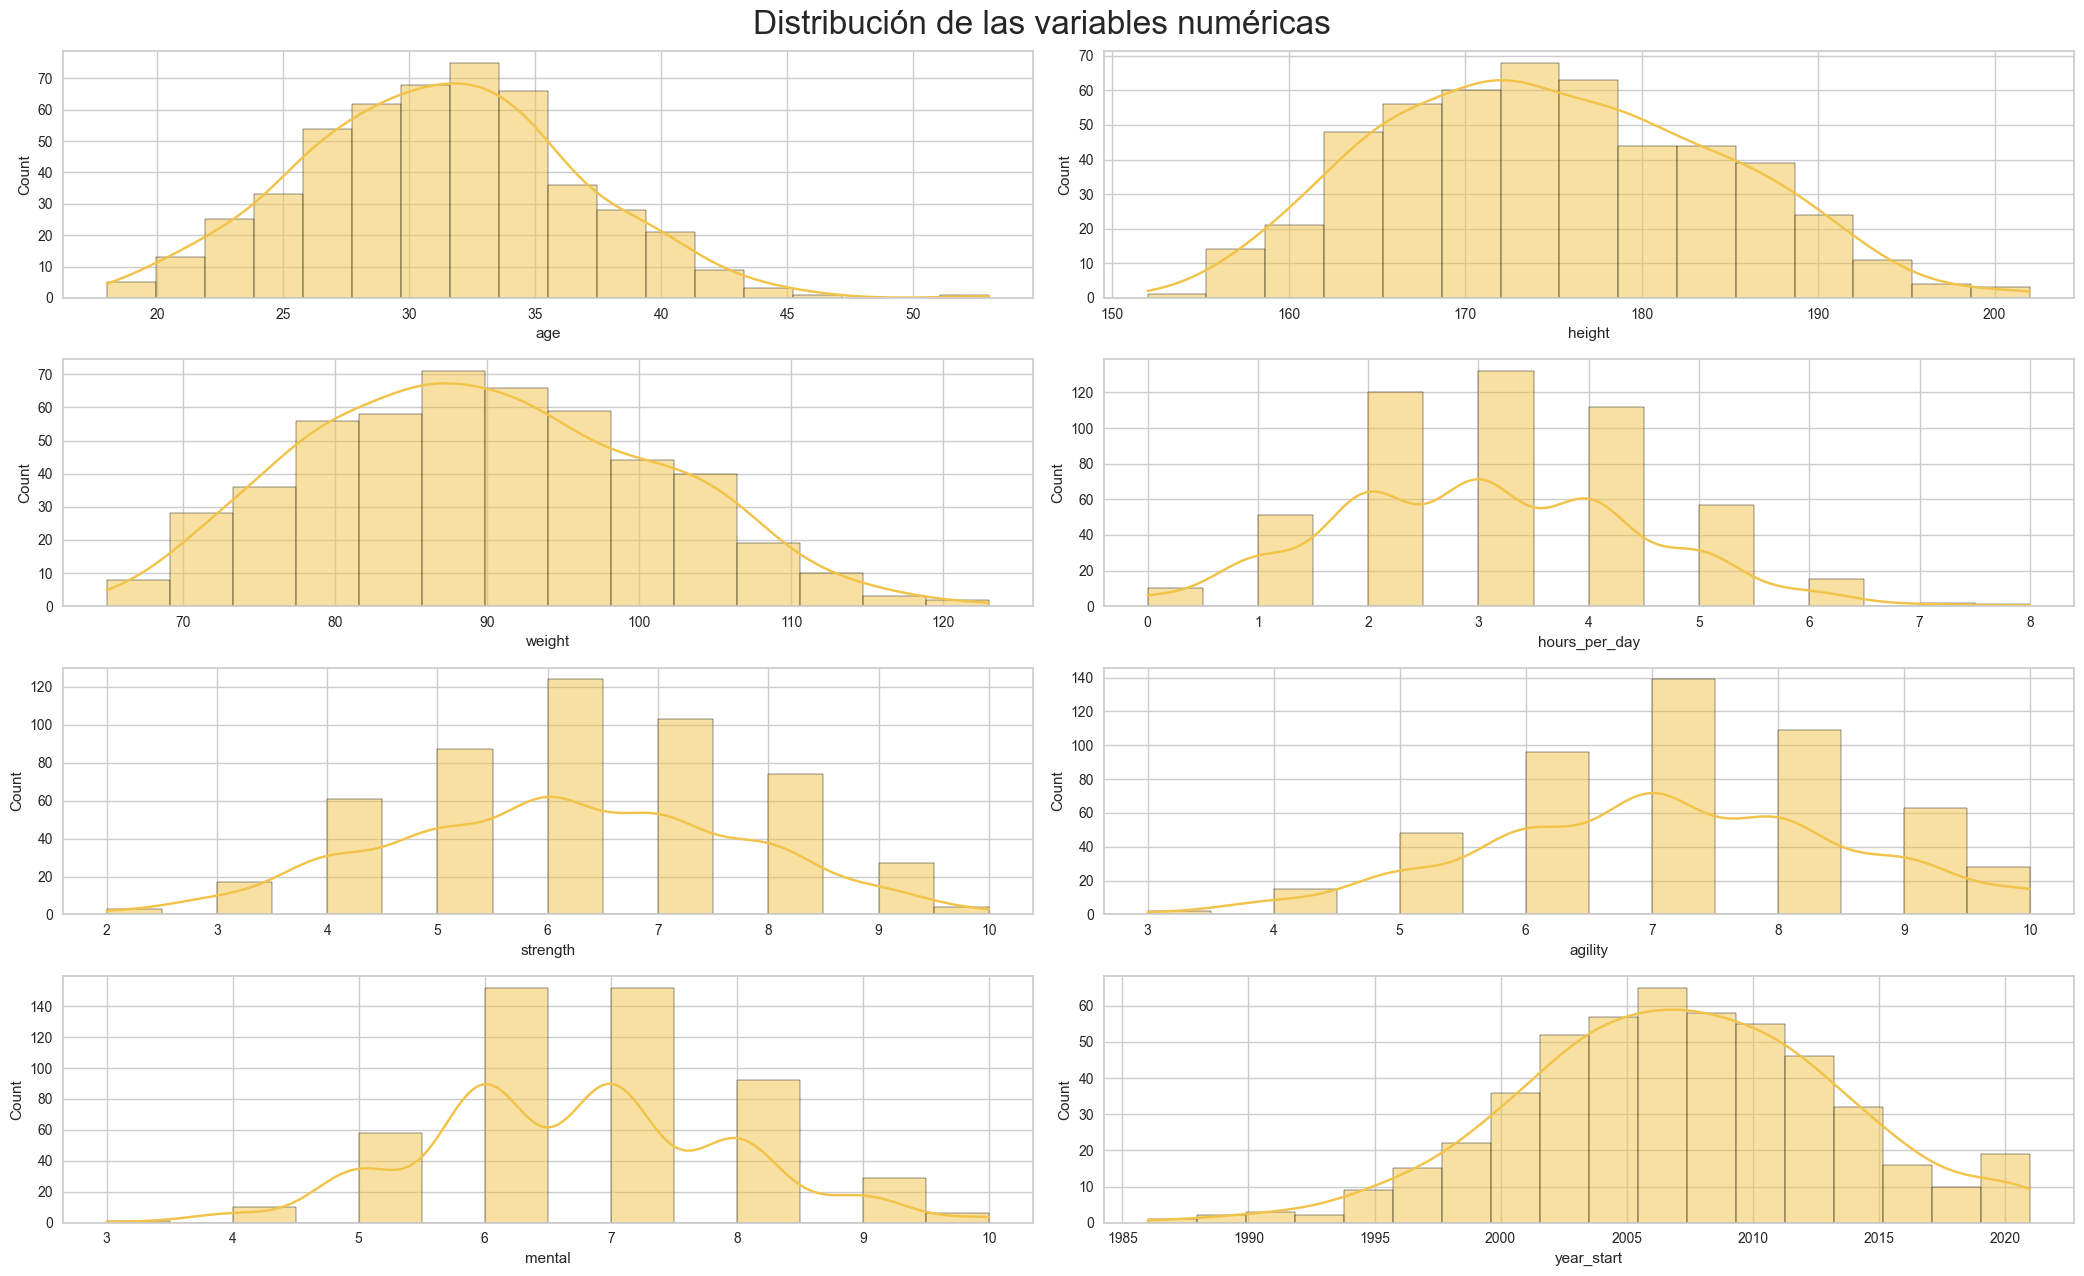

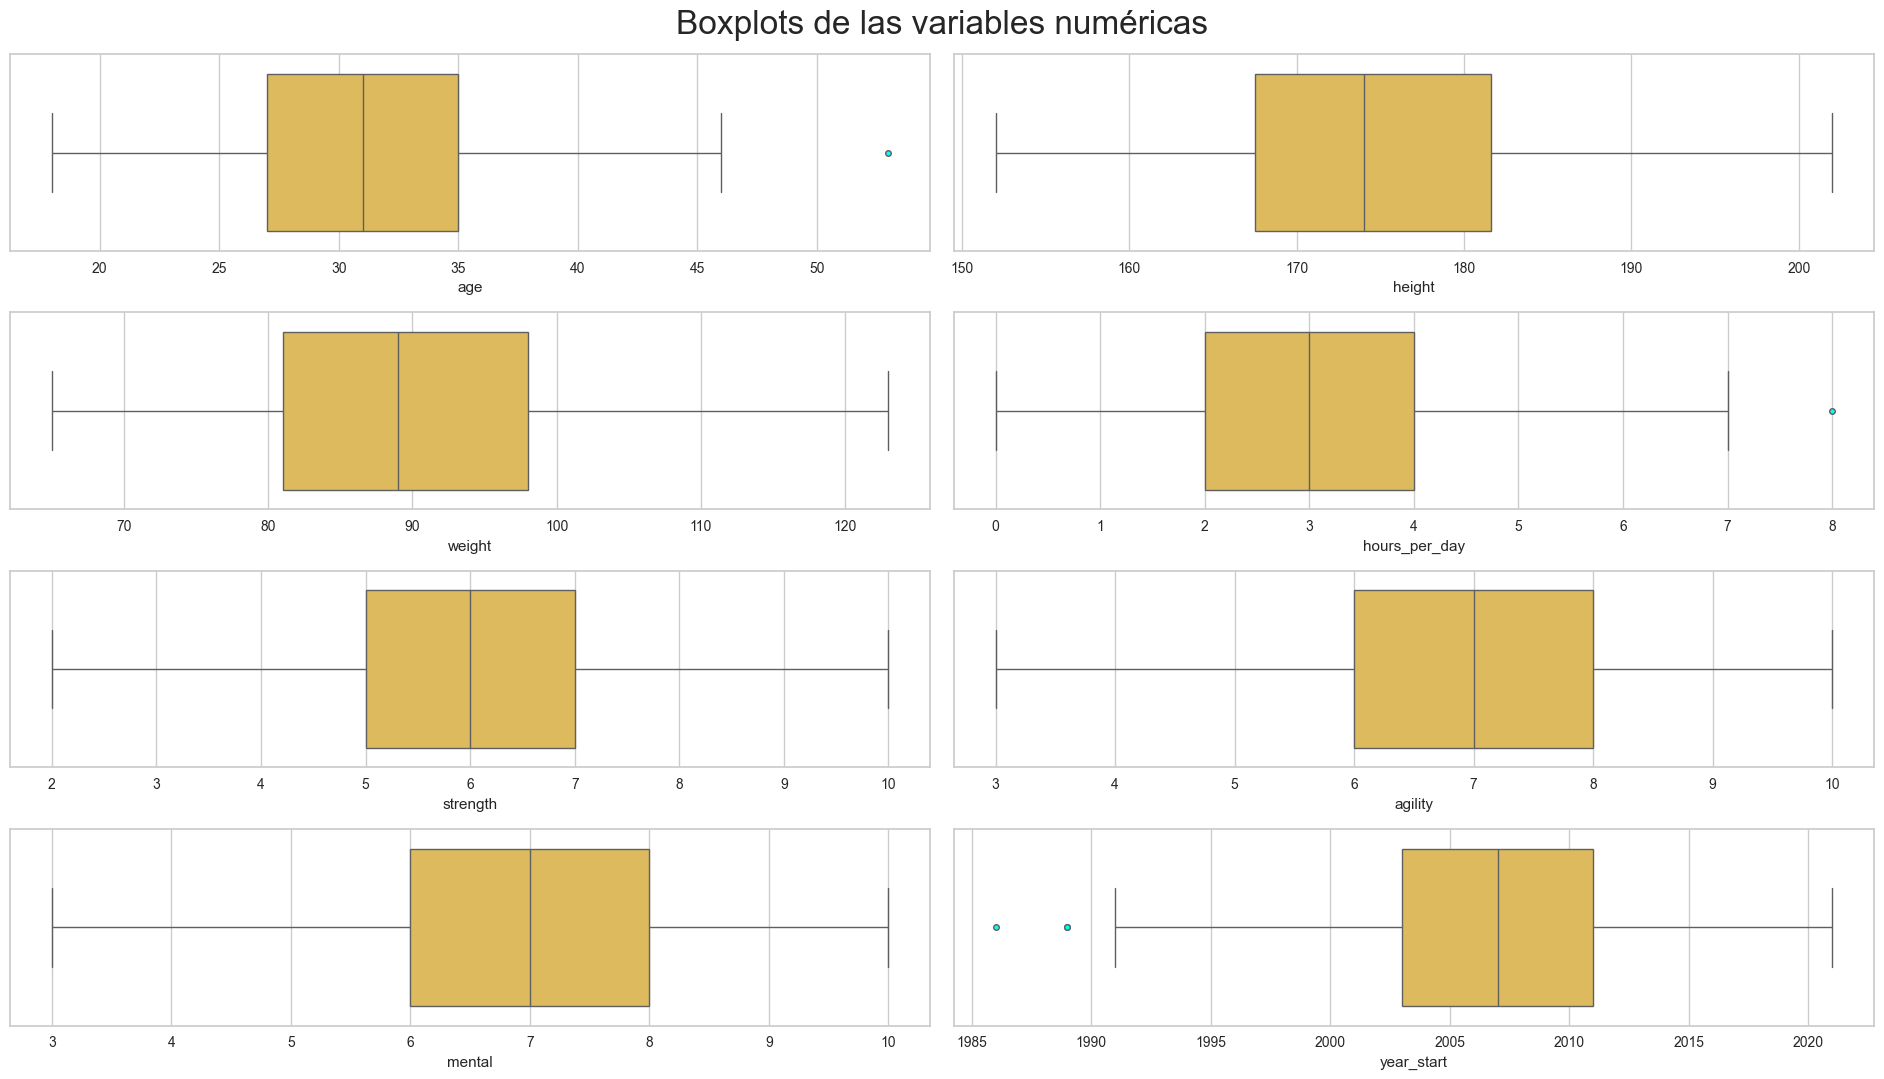

In [6]:
exploracion.visualizar_numericas()

- Podemos pasar a categoricas: strength, agility y mental.

- Para la exploración de las categoricas vamos hacerlo sin la columna "name". Antes hice un unique de esta columna y tiene 500 valores unicos por lo que la visualización va a resultar de mala manera. Además, no tiene mucho sentido ya que va a salir que todos los valores en 1 porque son todos unicos.

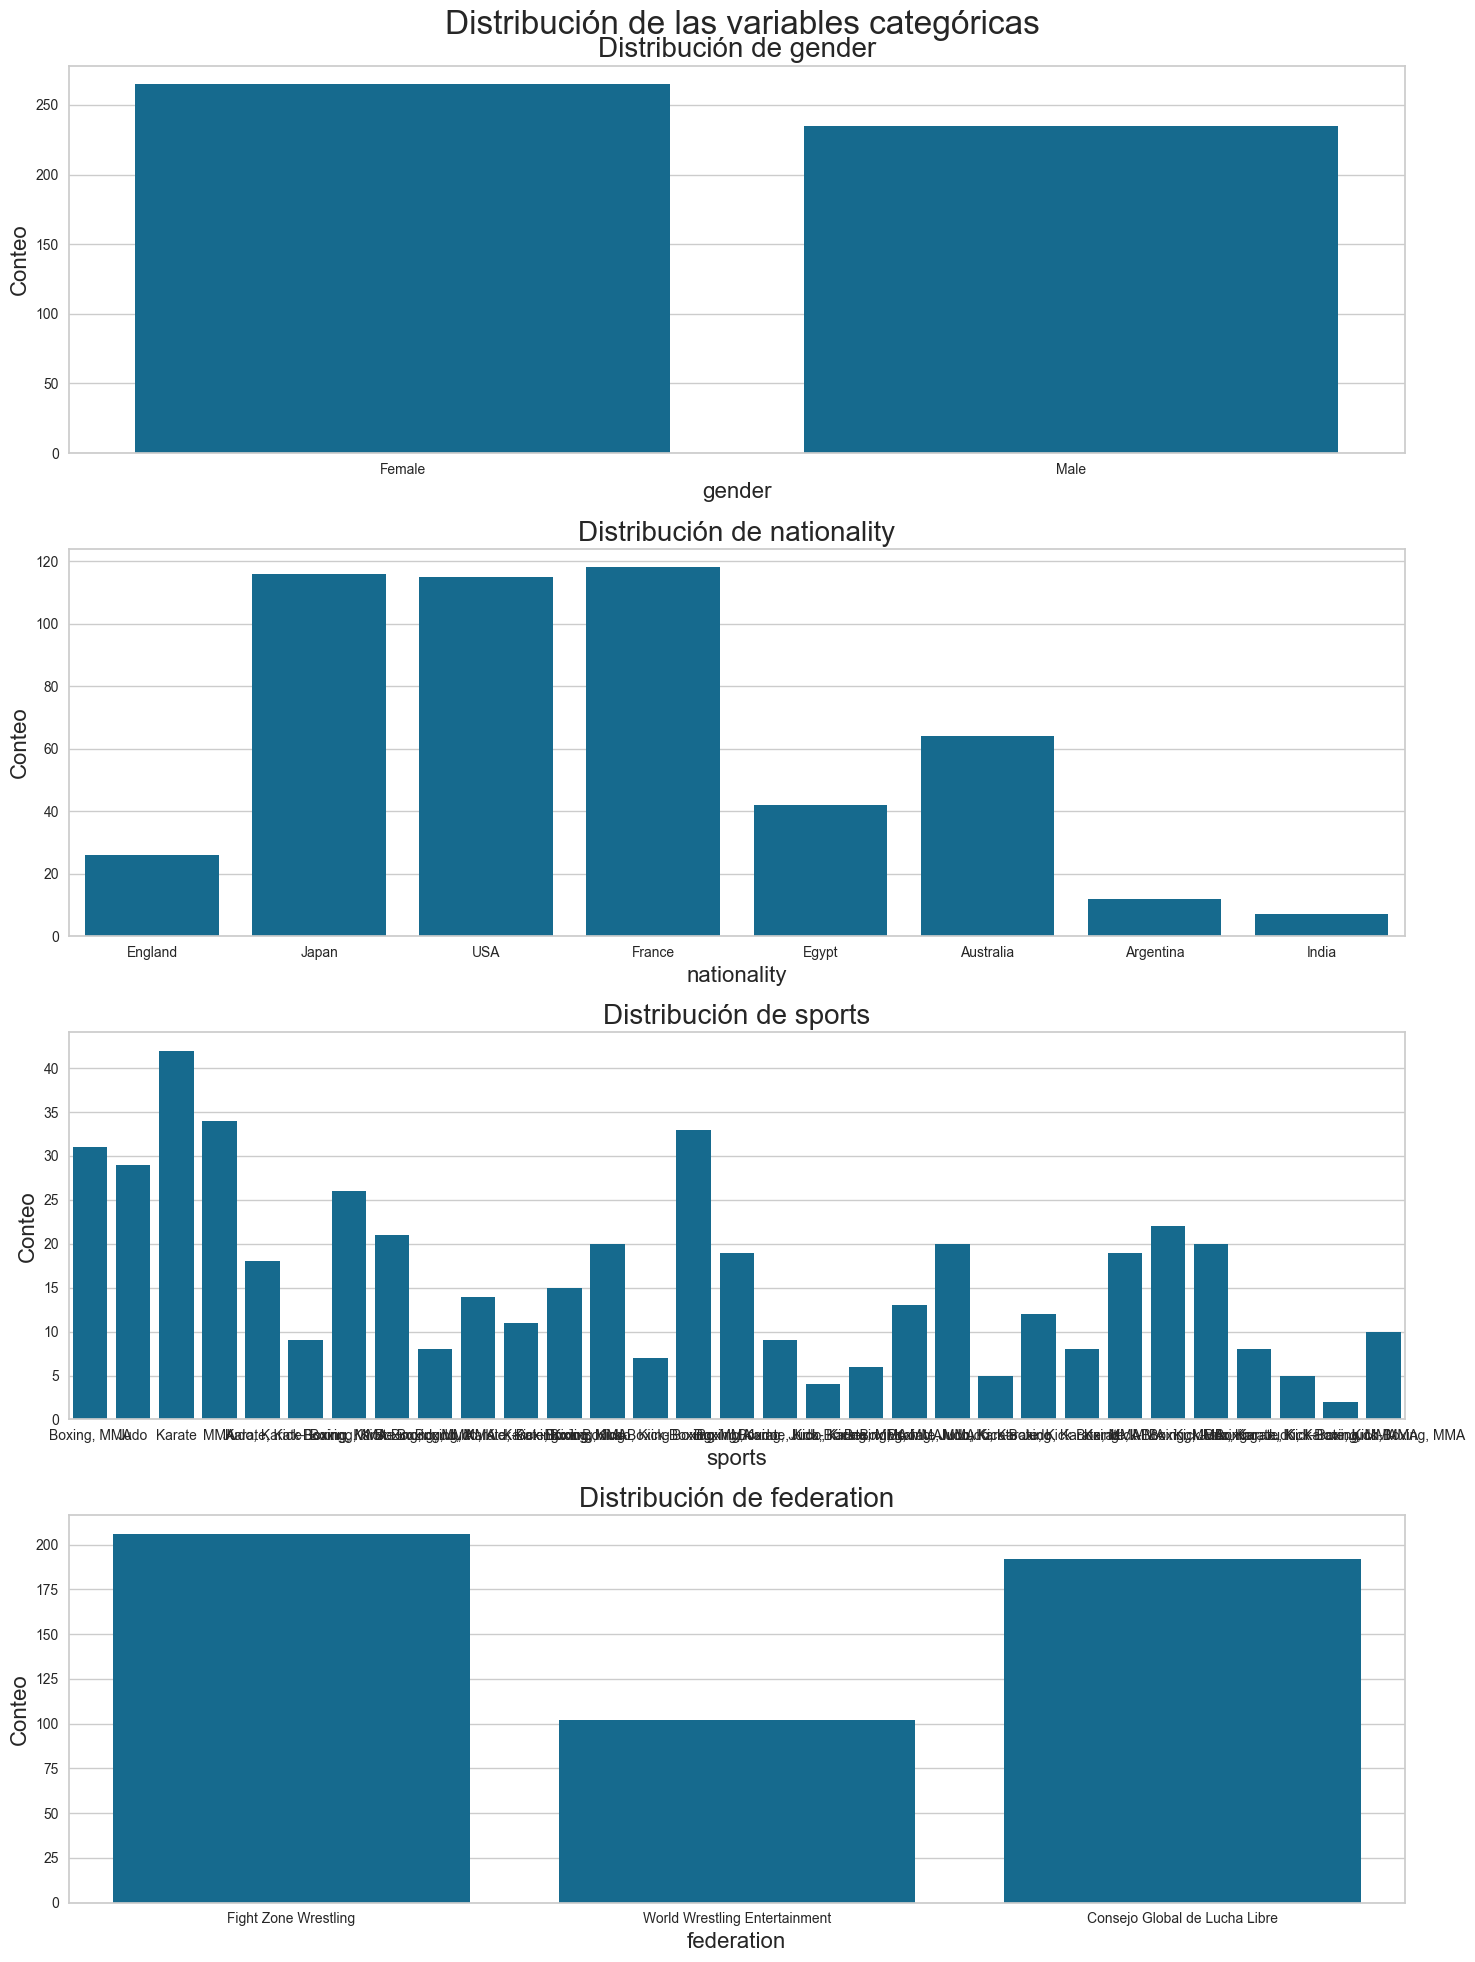

In [7]:
exploracion_cat = sc.Exploracion(df.drop(columns="name"))
exploracion_cat.visualizar_categoricas()

- Comprobamos la correlación de las columnas

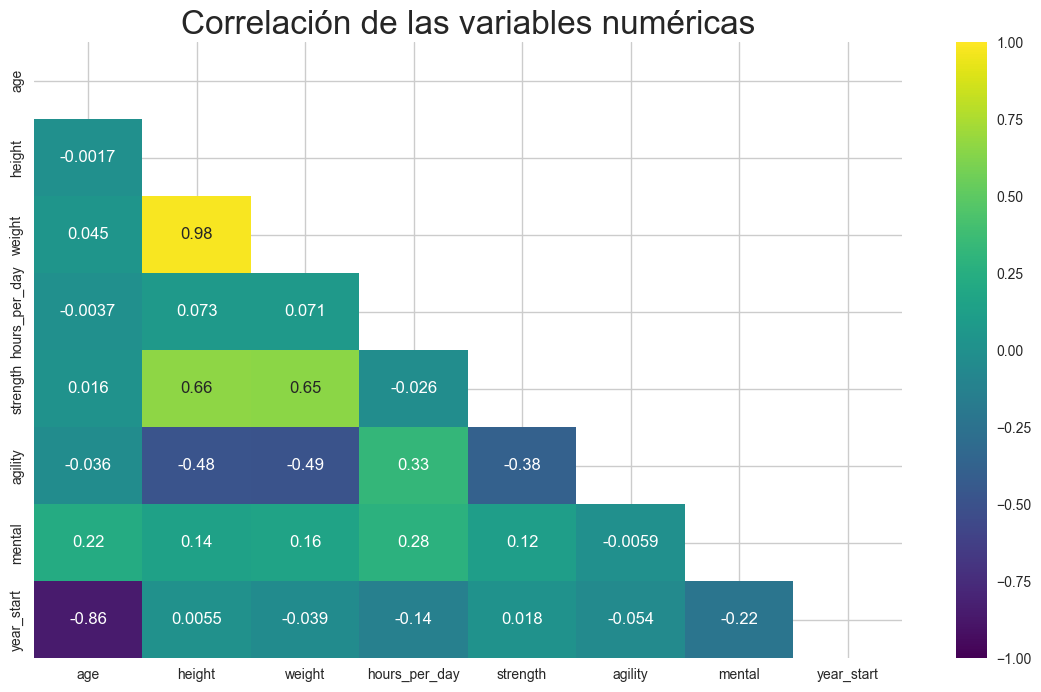

In [8]:
exploracion.correlacion()

- Preprocesado y estandarización con frecuencia y StandardScaler a través de los metodos que tenemos en src

In [9]:
preprocesado = sc.Preprocesado(df)
df_codificado = preprocesado.codificar()
df_codificado.head()

,name,gender,age,height,nationality,weight,sports,hours_per_day,strength,agility,mental,federation,year_start
0,0.002,0.53,41,165.0,0.052,82,0.062,3,7,8,7,0.412,1989
1,0.002,0.47,36,185.0,0.232,100,0.058,0,8,5,9,0.204,2006
2,0.002,0.47,29,178.5,0.232,93,0.084,4,8,8,7,0.204,2012
3,0.002,0.47,39,187.5,0.232,107,0.058,3,7,6,8,0.412,2003
4,0.002,0.53,29,158.0,0.230,72,0.068,1,5,7,7,0.384,2012


In [10]:
df_estandarizado = preprocesado.estandarizar()
df_estandarizado.head()

,name,gender,age,height,nationality,weight,sports,hours_per_day,strength,agility,mental,federation,year_start
0,-8.673617e-19,0.941697,1.812234,-1.042800,-1.982825,-0.694439,0.847297,-0.046579,0.541447,0.585973,0.223943,0.670142,-2.868861
1,-8.673617e-19,-1.061913,0.891945,1.071555,0.615973,0.931459,0.653761,-2.229969,1.179947,-1.477311,1.895156,-1.950750,-0.178809
2,-8.673617e-19,-1.061913,-0.396461,0.384390,0.615973,0.299165,1.911740,0.681218,1.179947,0.585973,0.223943,-1.950750,0.770621
3,-8.673617e-19,-1.061913,1.444118,1.335850,0.615973,1.563753,0.653761,-0.046579,0.541447,-0.789550,1.059549,0.670142,-0.653524
4,-8.673617e-19,0.941697,-0.396461,-1.782824,0.587097,-1.597716,1.137599,-1.502172,-0.735551,-0.101789,0.223943,0.317330,0.770621


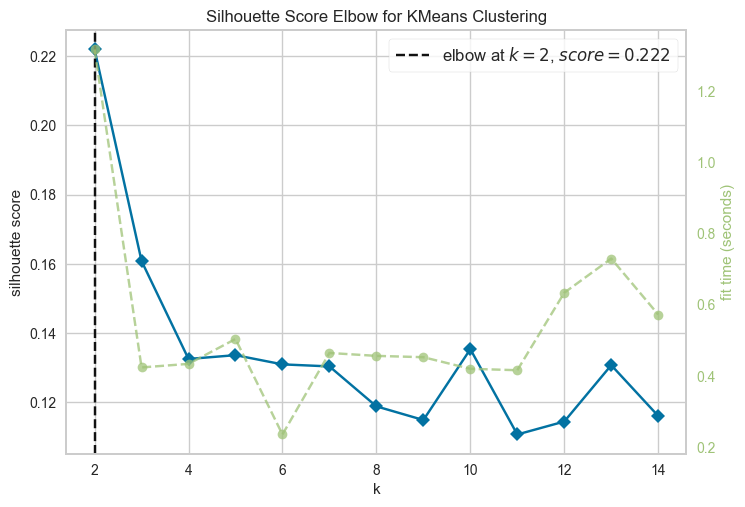

In [11]:
cluster = sc.Clustering(df)
cluster.sacar_clusters_kmeans()

- Después de ejecutarlo varias veces llego a la conclusión de usar 2 clusters

In [12]:
df_kmeans, labels = cluster.modelo_kmeans(df, 2)
df_kmeans = df.copy()
df_kmeans["cluster"] = labels
df_kmeans.head()

,name,gender,age,height,nationality,weight,sports,hours_per_day,strength,agility,mental,federation,year_start,clusters_kmeans,cluster
0,-8.673617e-19,0.941697,1.812234,-1.042800,-1.982825,-0.694439,0.847297,-0.046579,0.541447,0.585973,0.223943,0.670142,-2.868861,1,1
1,-8.673617e-19,-1.061913,0.891945,1.071555,0.615973,0.931459,0.653761,-2.229969,1.179947,-1.477311,1.895156,-1.950750,-0.178809,0,0
2,-8.673617e-19,-1.061913,-0.396461,0.384390,0.615973,0.299165,1.911740,0.681218,1.179947,0.585973,0.223943,-1.950750,0.770621,0,0
3,-8.673617e-19,-1.061913,1.444118,1.335850,0.615973,1.563753,0.653761,-0.046579,0.541447,-0.789550,1.059549,0.670142,-0.653524,0,0
4,-8.673617e-19,0.941697,-0.396461,-1.782824,0.587097,-1.597716,1.137599,-1.502172,-0.735551,-0.101789,0.223943,0.317330,0.770621,1,1


In [13]:
cluster.calcular_metricas(df_kmeans["cluster"])

,silhouette_score,davies_bouldin_index,cardinalidad
0,0.236268,1.641355,219


- Las metricas son bastante malas. Es muy probable que tengamos que revisar la columna sports.
- Tenemos la columna de clusters repetida por lo que eliminamos una de ellas.

In [14]:
df_kmeans.drop(columns="cluster", inplace=True)

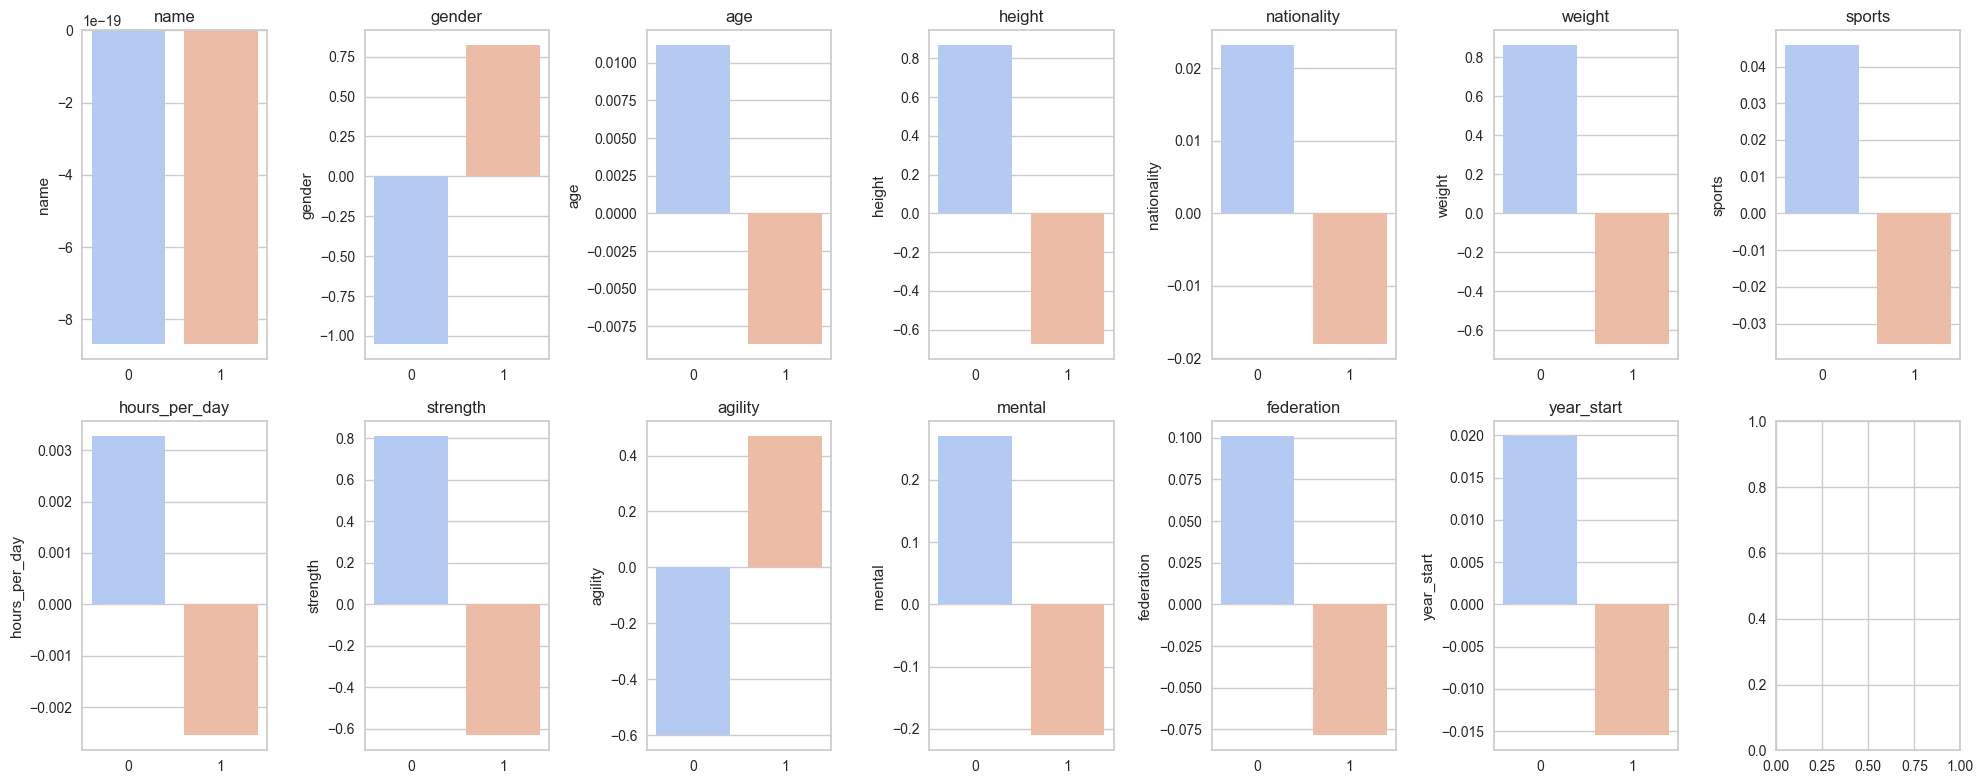

In [15]:
# Extraemos todas las columnas excepto la que contiene los clusters
lista_columnas = df_kmeans.drop(columns="clusters_kmeans").columns

# Creamos los subplots
fig, axes = plt.subplots(nrows=2, ncols=math.ceil(len(lista_columnas)/2), figsize=(20,8))
axes=axes.flat

# Iteramos sobre la lista de columnas para mostrar cada gráfico
for indice, columna in enumerate(lista_columnas):
    df_group = df_kmeans.groupby("clusters_kmeans")[columna].mean().reset_index()
    sns.barplot(x="clusters_kmeans", y= columna, hue="clusters_kmeans", data= df_group, ax=axes[indice], palette="coolwarm")
    axes[indice].set_title(columna)
    axes[indice].set_xlabel("")
plt.tight_layout()

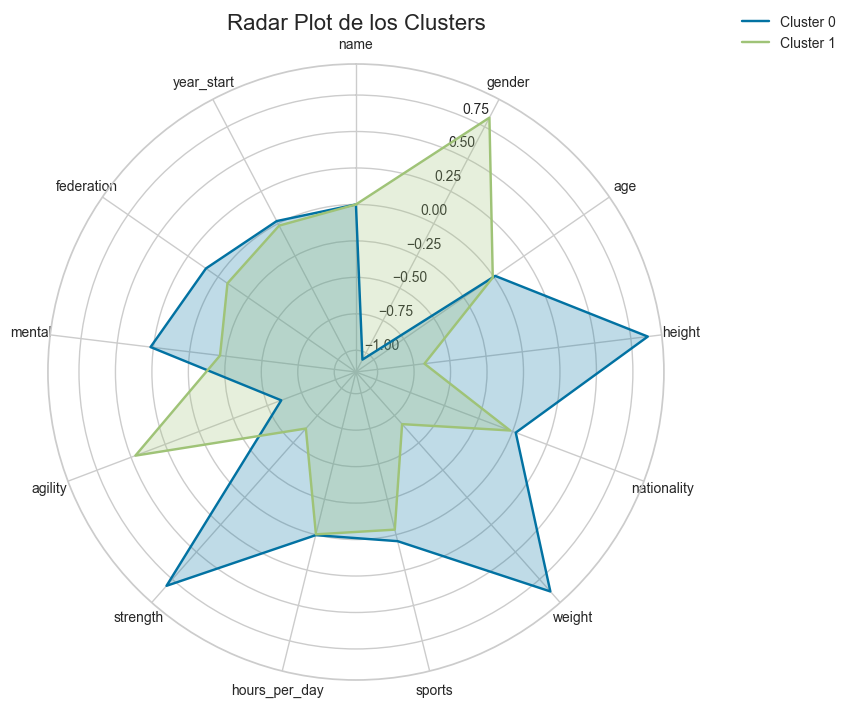

In [16]:
# Agrupar por cluster y calcular la media
cluster_means = df_kmeans.groupby("clusters_kmeans")[lista_columnas].mean()

# Repetir la primera columna al final para cerrar el radar
cluster_means = pd.concat([cluster_means, cluster_means.iloc[:, 0:1]], axis=1)

# Crear los ángulos para el radar plot
num_vars = len(lista_columnas)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # Cerrar el gráfico

# Crear el radar plot
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

# Dibujar un gráfico para cada cluster
for i, row in cluster_means.iterrows():
    ax.plot(angles, row, label=f'Cluster {i}')
    ax.fill(angles, row, alpha=0.25)

# Configurar etiquetas de los ejes
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(lista_columnas)

# Añadir leyenda y título
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
plt.title('Radar Plot de los Clusters', size=16)
plt.show()